In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
params = {'axes.labelsize':'xx-large',
            'axes.titlesize':'xx-large',
            'xtick.labelsize':'x-large'
            
}
pylab.rcParams.update(params)

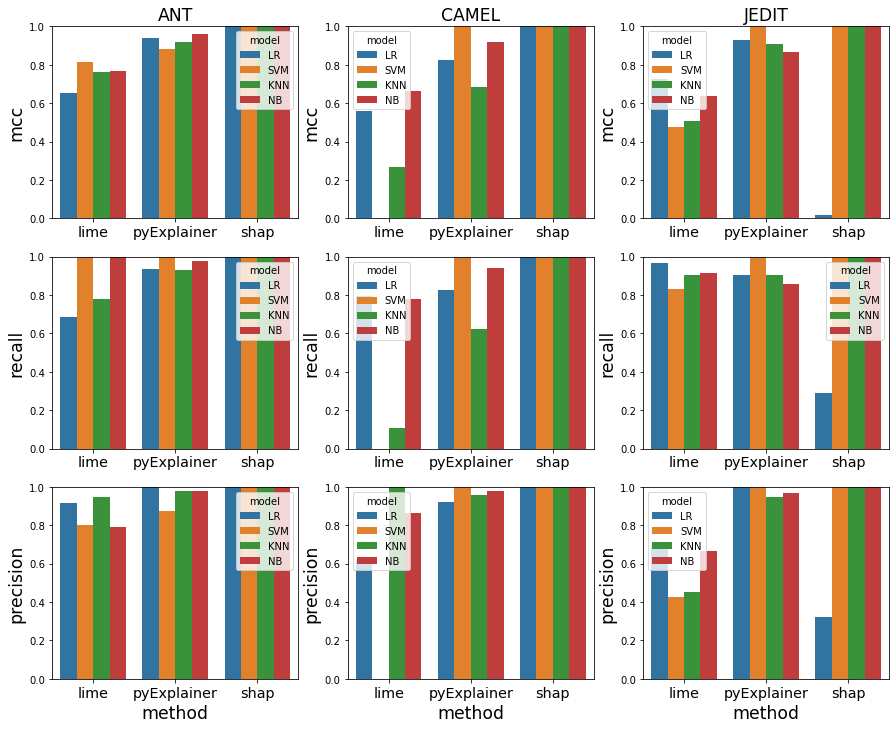

In [4]:
file = 'eval_results/metric1.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(3,3,figsize=(15,12))

axs[0,0].set_title('ANT')
axs[0,1].set_title('CAMEL')
axs[0,2].set_title('JEDIT')


plt.setp(axs,ylim=(0, 1),xlabel='')
sns.barplot(data=metric1dsANT, x='method',y='mcc',hue='model',ax=axs[0,0]).set(xlabel=None)
sns.barplot(data=metric1dsCAMEL, x='method',y='mcc',hue='model',ax=axs[0,1]).set(xlabel=None)
sns.barplot(data=metric1dsJEDIT, x='method',y='mcc',hue='model',ax=axs[0,2]).set(xlabel=None)

sns.barplot(data=metric1dsANT, x='method',y='recall',hue='model',ax=axs[1,0]).set(xlabel=None)
sns.barplot(data=metric1dsCAMEL, x='method',y='recall',hue='model',ax=axs[1,1]).set(xlabel=None)
sns.barplot(data=metric1dsJEDIT, x='method',y='recall',hue='model',ax=axs[1,2]).set(xlabel=None)

sns.barplot(data=metric1dsANT, x='method',y='precision',hue='model',ax=axs[2,0])
sns.barplot(data=metric1dsCAMEL, x='method',y='precision',hue='model',ax=axs[2,1])
sns.barplot(data=metric1dsJEDIT, x='method',y='precision',hue='model',ax=axs[2,2])

plt.show()

<AxesSubplot:title={'center':'CAMEL'}, xlabel='method', ylabel='avg_recall'>

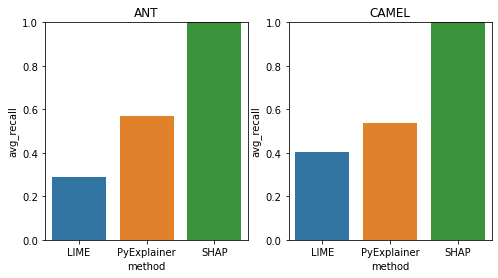

In [21]:
# OLD VER
# internal fidelity (with LR as interpretable task model)
file = 'eval_results/metric2.csv'
metric2ds = pd.read_csv(file)
metric2dsANT = metric2ds[metric2ds.project == 'ANT']
metric2dsCAMEL = metric2ds[metric2ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))

sns.barplot(data=metric2dsANT, x='method',y='avg_recall',ax=axs[0])
sns.barplot(data=metric2dsCAMEL, x='method',y='avg_recall',ax=axs[1])

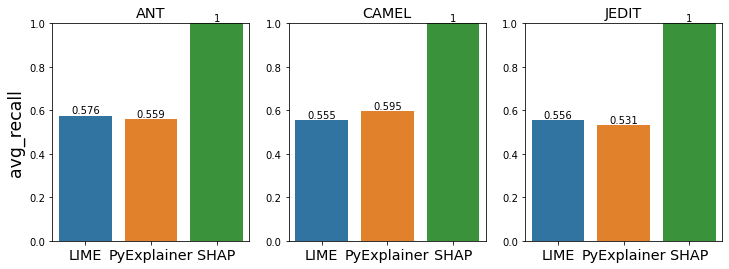

In [22]:
# internal fidelity (with LR as interpretable task model)
file = 'eval_results/metric2.csv'
metric2ds = pd.read_csv(file)
metric2dsANT = metric2ds[metric2ds.project == 'ANT']
metric2dsCAMEL = metric2ds[metric2ds.project == 'CAMEL']
metric2dsJEDIT = metric2ds[metric2ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))
axs[2].set(ylim=(0, 1))

sns.barplot(data=metric2dsANT, x='method',y='avg_recall',ax=axs[0]).set(xlabel=None)
sns.barplot(data=metric2dsCAMEL, x='method',y='avg_recall',ax=axs[1]).set(xlabel=None,ylabel=None)
sns.barplot(data=metric2dsJEDIT, x='method',y='avg_recall',ax=axs[2]).set(xlabel=None,ylabel=None)
for i in range(3):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()

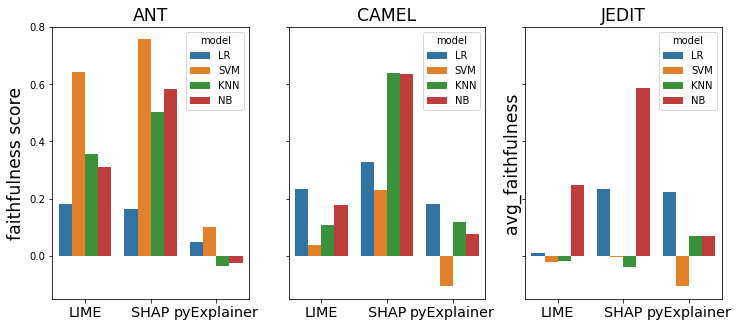

In [25]:
# metric 3 - faithfulness
file = 'eval_results/metric3.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(12,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')

# plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric1dsANT, x='method',y='avg_faithfulness',hue='model',ax=axs[0]).set(xlabel=None)
sns.barplot(data=metric1dsCAMEL, x='method',y='avg_faithfulness',hue='model',ax=axs[1]).set(xlabel=None)
sns.barplot(data=metric1dsJEDIT, x='method',y='avg_faithfulness',hue='model',ax=axs[2]).set(xlabel=None)

axs[0].set(ylabel='faithfulness score')
axs[1].set(ylabel='')
# for i in range(2):
#     for container in axs[i].containers:
#         axs[i].bar_label(container)
plt.show()

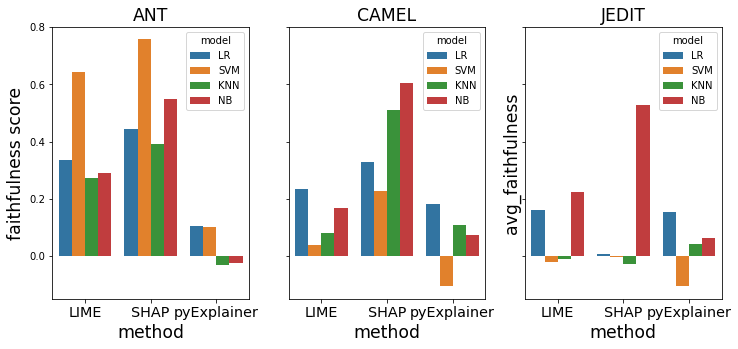

In [5]:
# metric 3 - faithfulness
file = 'eval_results/metric3.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(12,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')

# plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric1dsANT, x='method',y='avg_faithfulness',hue='model',ax=axs[0])
sns.barplot(data=metric1dsCAMEL, x='method',y='avg_faithfulness',hue='model',ax=axs[1])
sns.barplot(data=metric1dsJEDIT, x='method',y='avg_faithfulness',hue='model',ax=axs[2])

axs[0].set(ylabel='faithfulness score')
axs[1].set(ylabel='')
# for i in range(2):
#     for container in axs[i].containers:
#         axs[i].bar_label(container)
plt.show()

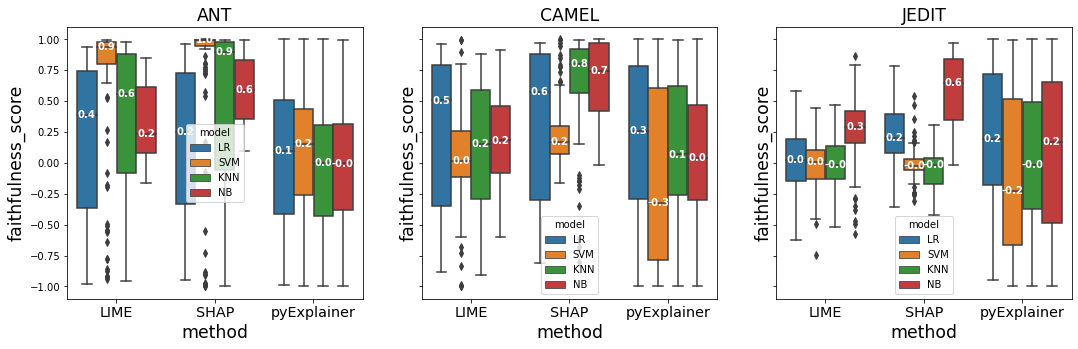

In [29]:
file = 'eval_results/fs.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(18,5), sharey='row')
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')
plot1= sns.boxplot(data=metric1dsANT, x='method',y='faithfulness_score',hue='model',ax=axs[0])
plot2= sns.boxplot(data=metric1dsCAMEL, x='method',y='faithfulness_score',hue='model',ax=axs[1])
plot3= sns.boxplot(data=metric1dsJEDIT, x='method',y='faithfulness_score',hue='model',ax=axs[2])
add_median_labels(plot1)
add_median_labels(plot2)
add_median_labels(plot3)



After removing instances of zero correlation, some of the average values increase 

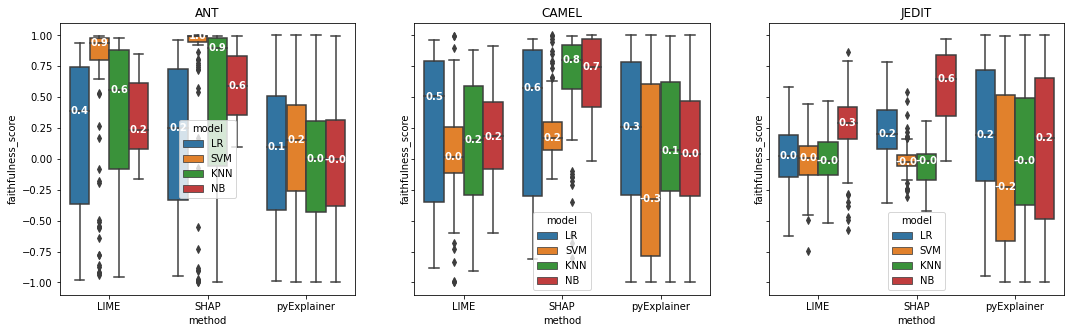

In [13]:
file = 'eval_results/fs.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(18,5), sharey='row')
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')
plot1= sns.boxplot(data=metric1dsANT, x='method',y='faithfulness_score',hue='model',ax=axs[0])
plot2= sns.boxplot(data=metric1dsCAMEL, x='method',y='faithfulness_score',hue='model',ax=axs[1])
plot3= sns.boxplot(data=metric1dsJEDIT, x='method',y='faithfulness_score',hue='model',ax=axs[2])
add_median_labels(plot1)
add_median_labels(plot2)
add_median_labels(plot3)


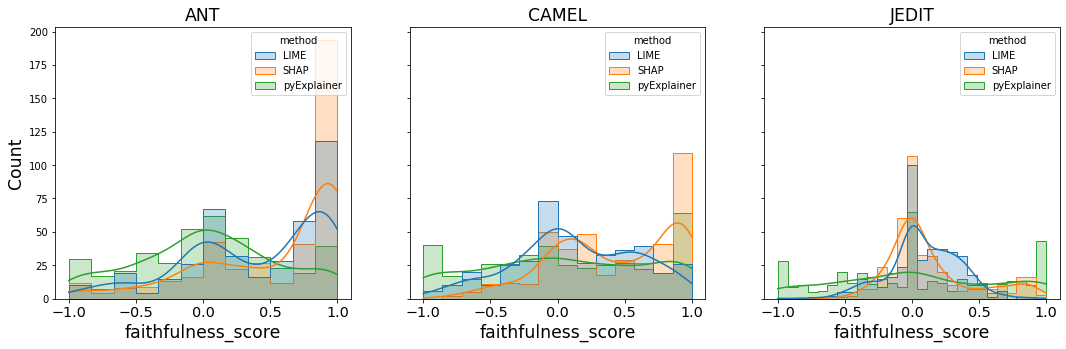

In [6]:
file = 'eval_results/fs.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(18,5), sharey='row')
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')


plot1= sns.histplot(data=metric1dsANT,x='faithfulness_score',hue='method',ax=axs[0],element="step",kde=True)
plot2= sns.histplot(data=metric1dsCAMEL,x='faithfulness_score',hue='method',ax=axs[1],element="step",kde=True)
plot3= sns.histplot(data=metric1dsJEDIT,x='faithfulness_score',hue='method',ax=axs[2],element="step",kde=True)

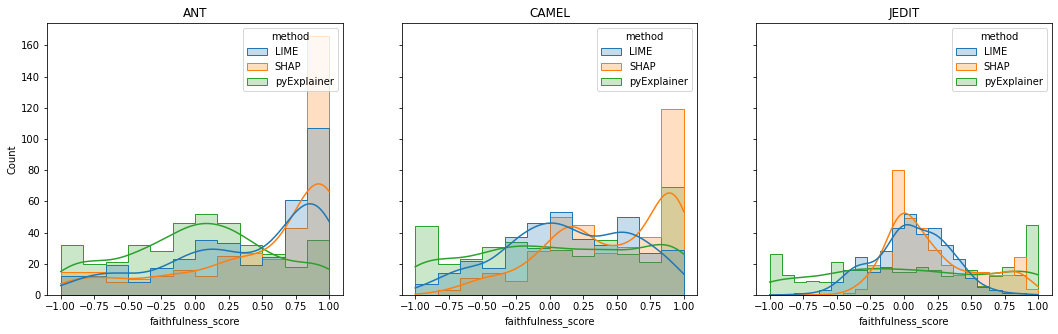

In [14]:
file = 'eval_results/fs.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(18,5), sharey='row')
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')


plot1= sns.histplot(data=metric1dsANT,x='faithfulness_score',hue='method',ax=axs[0],element="step",kde=True)
plot2= sns.histplot(data=metric1dsCAMEL,x='faithfulness_score',hue='method',ax=axs[1],element="step",kde=True)
plot3= sns.histplot(data=metric1dsJEDIT,x='faithfulness_score',hue='method',ax=axs[2],element="step",kde=True)

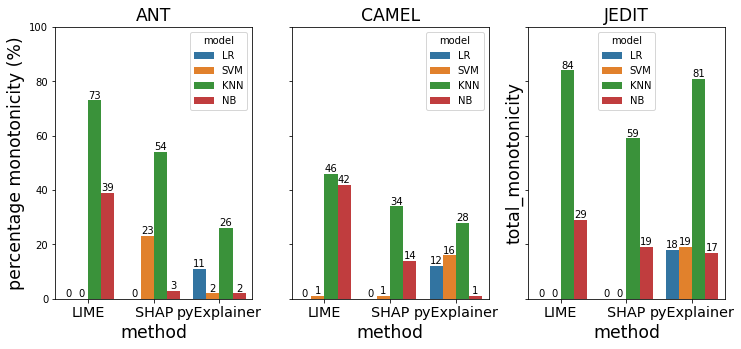

In [7]:
# metric 4 - monotonicity
file = 'eval_results/metric4.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']
metric1dsJEDIT = metric1ds[metric1ds.project == 'JEDIT']

fig, axs = plt.subplots(1,3,figsize=(12,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[2].set_title('JEDIT')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric1dsANT, x='method',y='total_monotonicity',hue='model',ax=axs[0])
sns.barplot(data=metric1dsCAMEL, x='method',y='total_monotonicity',hue='model',ax=axs[1])
sns.barplot(data=metric1dsJEDIT, x='method',y='total_monotonicity',hue='model',ax=axs[2])

axs[0].set(ylabel='percentage monotonicity (%)')
axs[1].set(ylabel='')
for i in range(3):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()


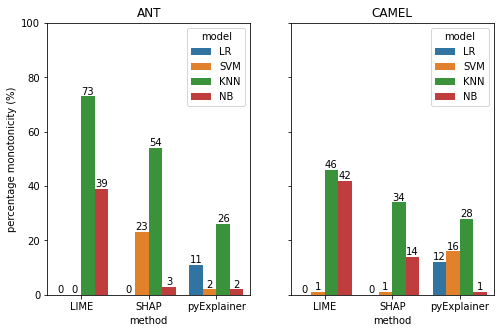

In [4]:
# metric 4 - monotonicity
file = 'eval_results/metric4.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(8,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric1dsANT, x='method',y='total_monotonicity',hue='model',ax=axs[0])
sns.barplot(data=metric1dsCAMEL, x='method',y='total_monotonicity',hue='model',ax=axs[1])
axs[0].set(ylabel='percentage monotonicity (%)')
axs[1].set(ylabel='')
for i in range(2):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()


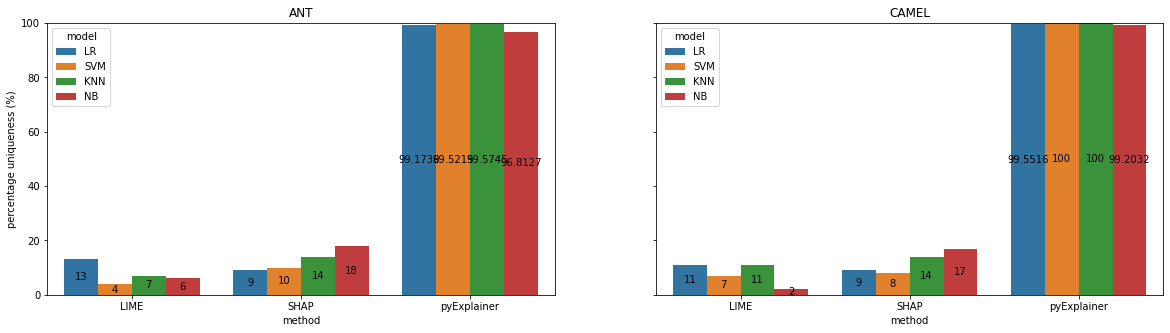

In [8]:
# metric 5 - uniqueness
file = 'eval_results/metric5.csv'
metric5ds = pd.read_csv(file)
metric5dsANT = metric5ds[metric5ds.project == 'ANT']
metric5dsCAMEL = metric5ds[metric5ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(20,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric5dsANT, x='method',y='uniqueness',hue='model',ax=axs[0])
sns.barplot(data=metric5dsCAMEL, x='method',y='uniqueness',hue='model',ax=axs[1])
axs[0].set(ylabel='percentage uniqueness (%)')
axs[1].set(ylabel='')
for i in range(2):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()


In [9]:
np.set_printoptions(precision=1)

In [ ]:
# metric 5 - uniqueness
file = 'eval_results/metric5.csv'
metric5ds = pd.read_csv(file)
metric5dsANT = metric5ds[metric5ds.project == 'ANT']
metric5dsCAMEL = metric5ds[metric5ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(20,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric5dsANT, x='method',y='uniqueness',hue='model',ax=axs[0])
sns.barplot(data=metric5dsCAMEL, x='method',y='uniqueness',hue='model',ax=axs[1])
axs[0].set(ylabel='percentage uniqueness (%)')
axs[1].set(ylabel='')
for i in range(2):
    # for container in axs[i].containers:
    #     axs[i].bar_label(container)
    for p in axs[i].patches:
        axs[i].text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.1f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')


plt.show()

In [28]:
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')

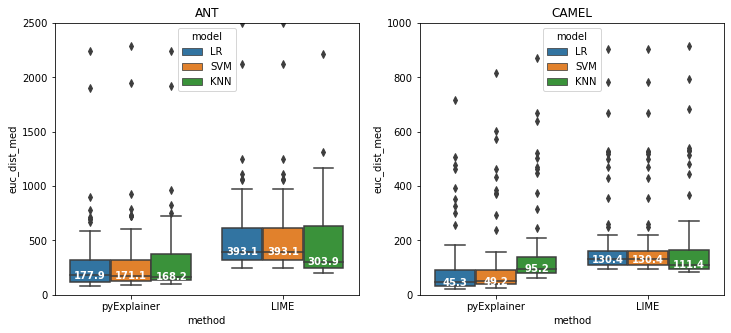

In [18]:
# metric 6 - similarity
file = 'eval_results/metric6.csv'
metric6ds = pd.read_csv(file)
metric6dsANT = metric6ds[metric6ds.project == 'ANT']
metric6dsCAMEL = metric6ds[metric6ds.project == 'CAMEL']


fig, axs = plt.subplots(1,2,figsize=(12,5))

plot1= sns.boxplot(data=metric6dsANT, x='method',y='euc_dist_med',hue='model',ax=axs[0])
plot2= sns.boxplot(data=metric6dsCAMEL, x='method',y='euc_dist_med',hue='model',ax=axs[1])

add_median_labels(plot1)
add_median_labels(plot2)

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[0].set(ylim=(0, 2500))
axs[1].set(ylim=(0, 1000))


plt.show()



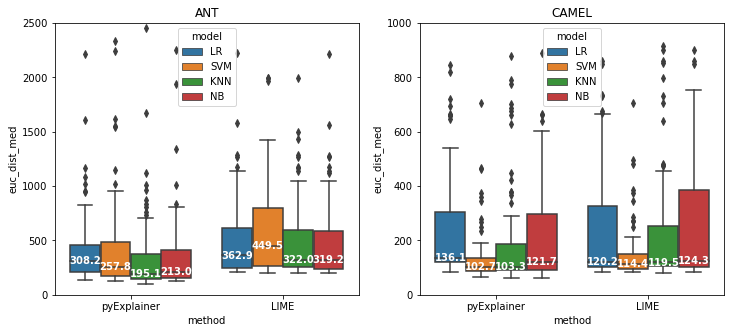

In [8]:
# metric 6 - similarity
file = 'eval_results/metric6.csv'
metric6ds = pd.read_csv(file)
metric6dsANT = metric6ds[metric6ds.project == 'ANT']
metric6dsCAMEL = metric6ds[metric6ds.project == 'CAMEL']


fig, axs = plt.subplots(1,2,figsize=(12,5))

plot1= sns.boxplot(data=metric6dsANT, x='method',y='euc_dist_med',hue='model',ax=axs[0])
plot2= sns.boxplot(data=metric6dsCAMEL, x='method',y='euc_dist_med',hue='model',ax=axs[1])

add_median_labels(plot1)
add_median_labels(plot2)

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[0].set(ylim=(0, 2500))
axs[1].set(ylim=(0, 1000))


plt.show()
